# Data Split Result Plotting

In [1]:
DUMP_FILE = "../output/data/dataset.joblib"
OUTPUT_STAT_PATH = "../output/csv-stat"

In [2]:
from pathlib import Path
from logging import basicConfig, INFO
from joblib import load
from matplotlib import font_manager, pyplot as plt

basicConfig(level=INFO)

from dataset_type import Dataset

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

In [3]:
DUMP_FILE = Path(DUMP_FILE).resolve()
OUTPUT_STAT_PATH = Path(OUTPUT_STAT_PATH).resolve()
OUTPUT_STAT_PATH.mkdir(parents=True, exist_ok=True)

assert DUMP_FILE.is_file()

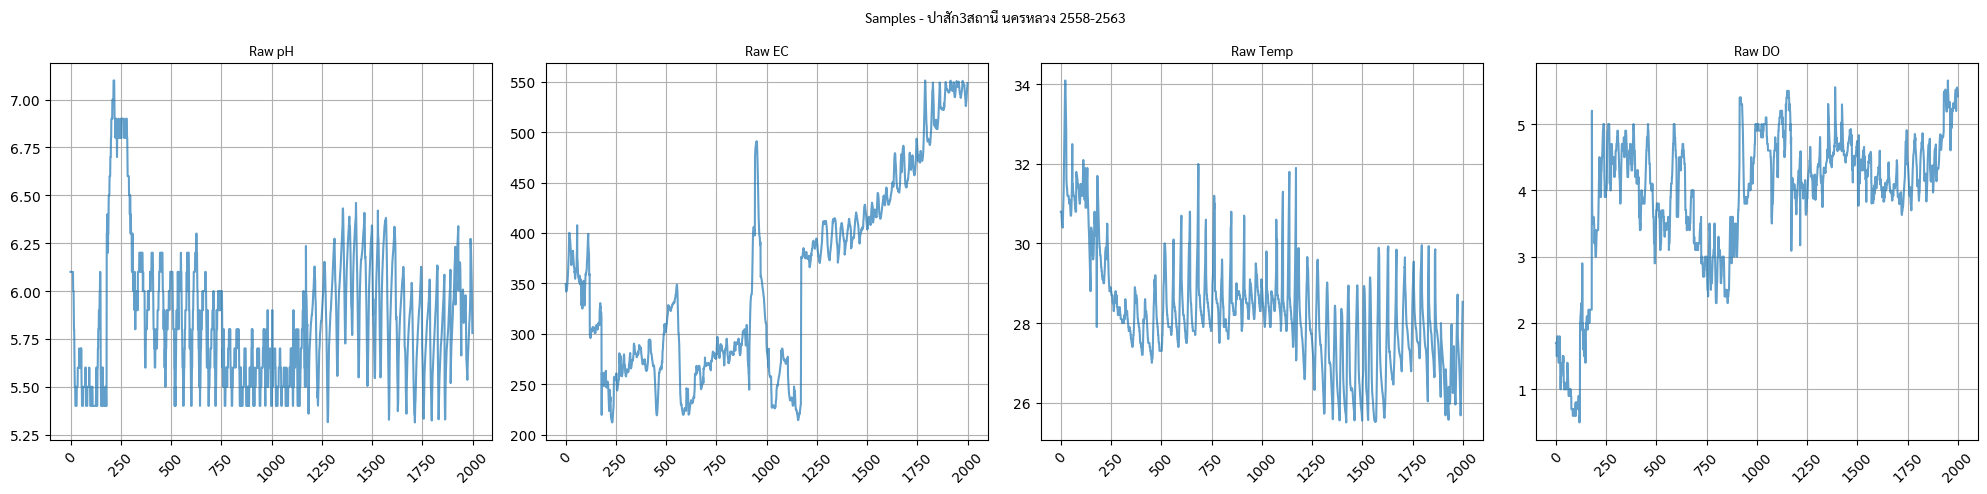

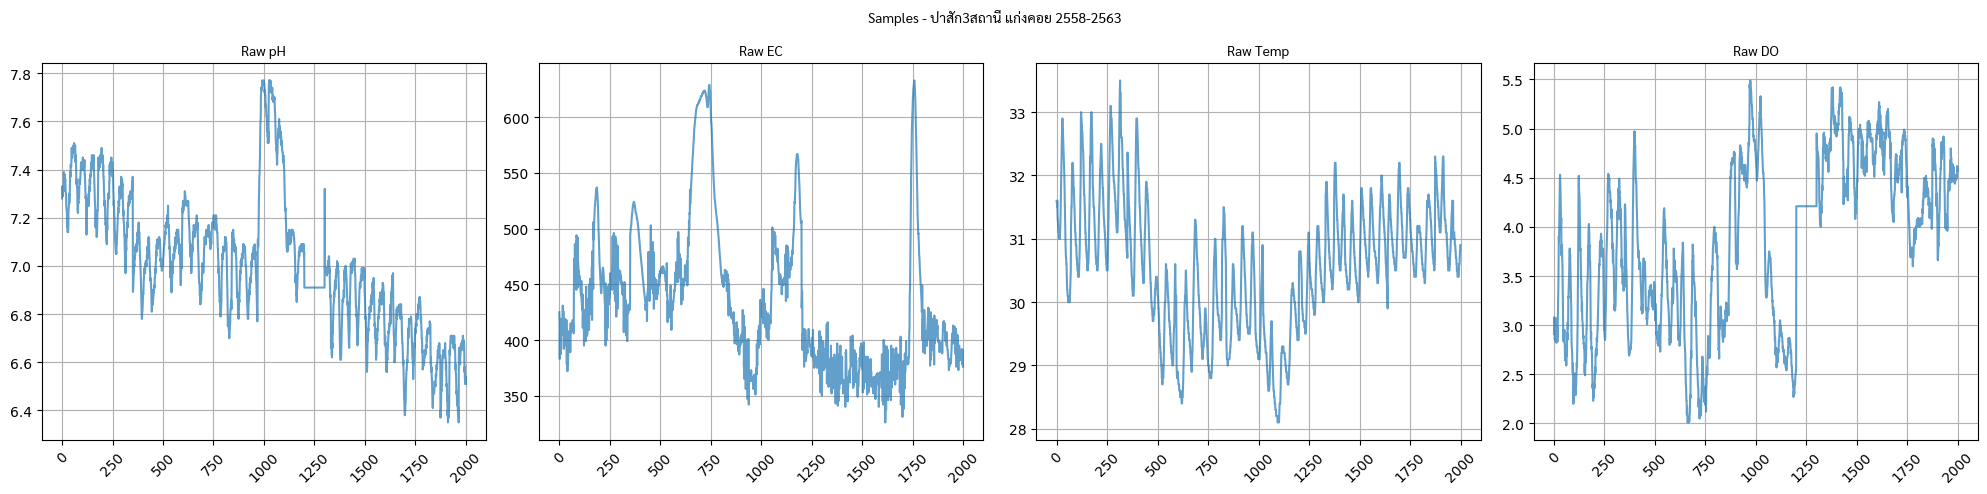

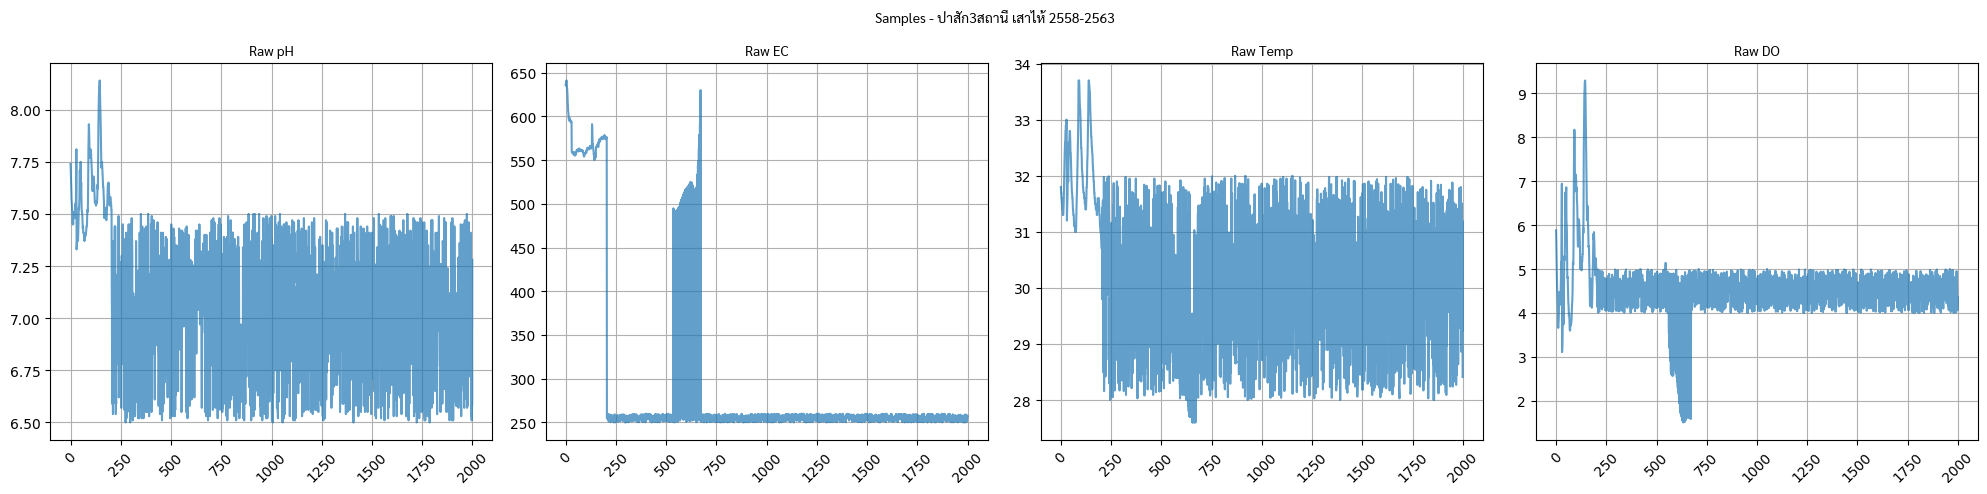

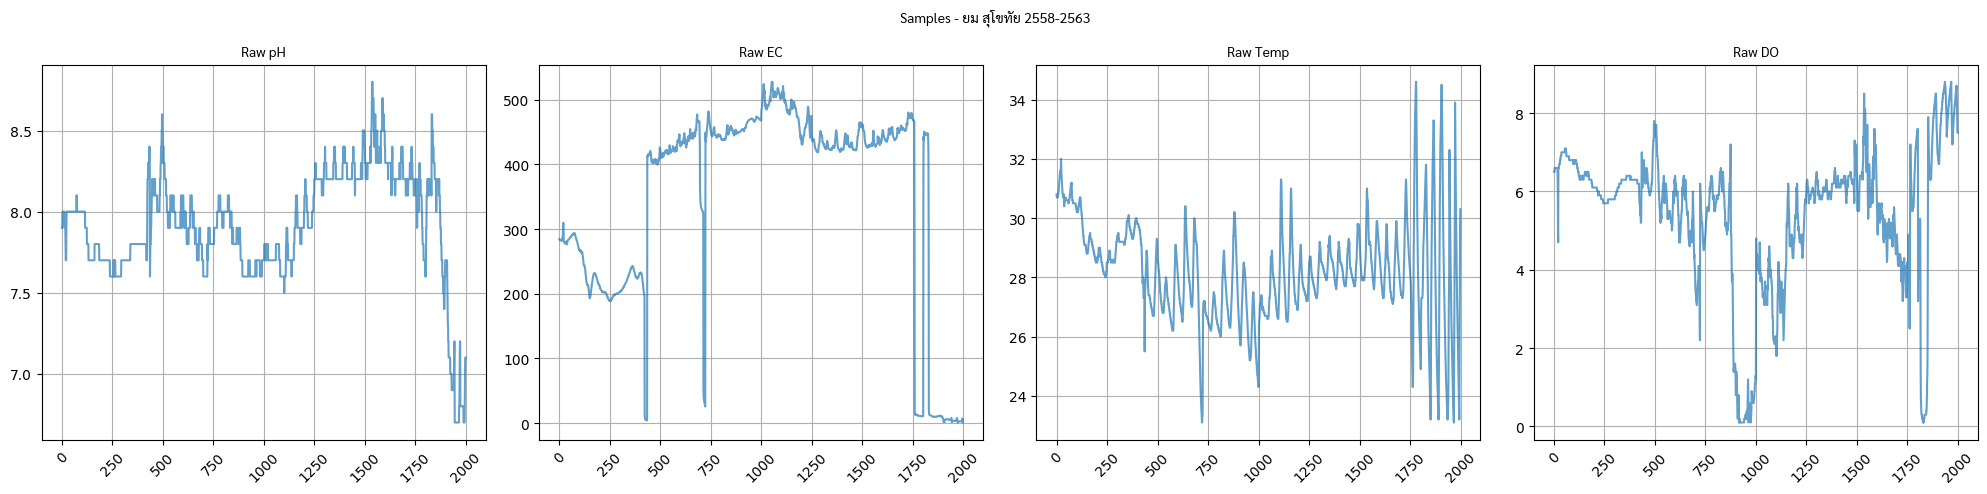

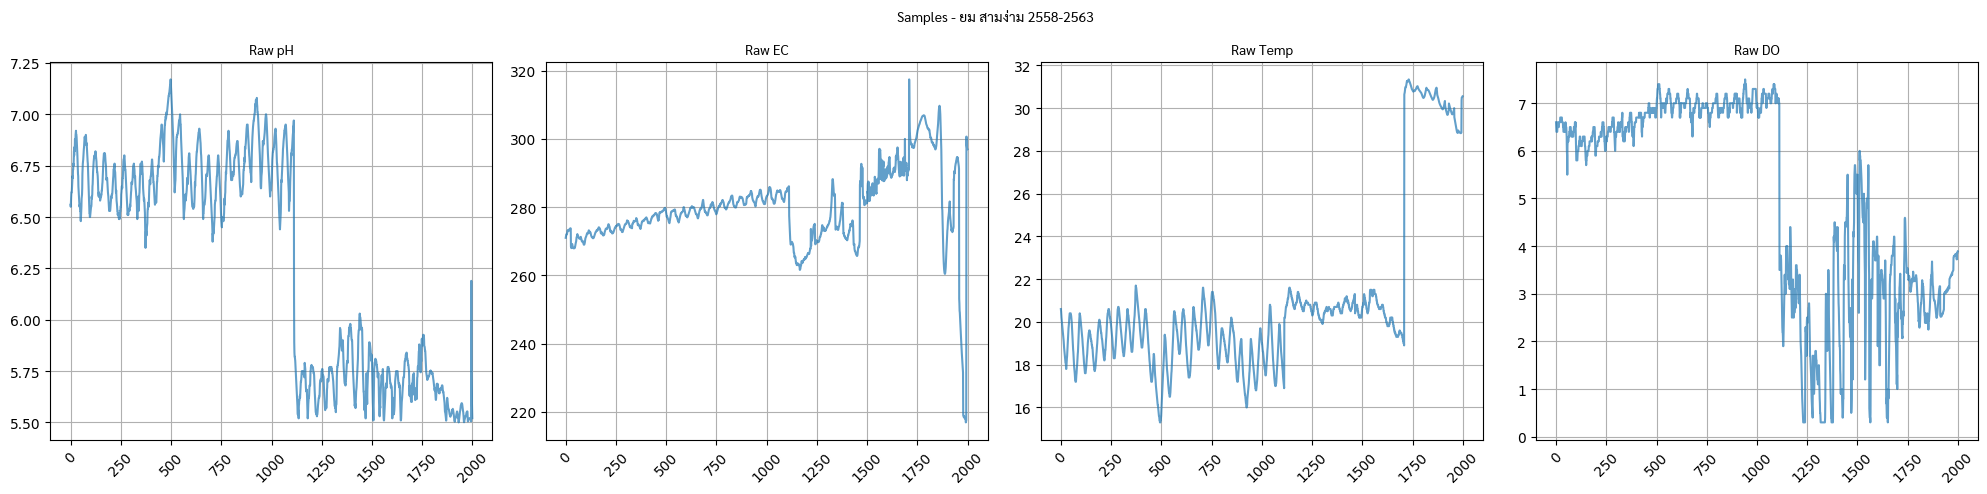

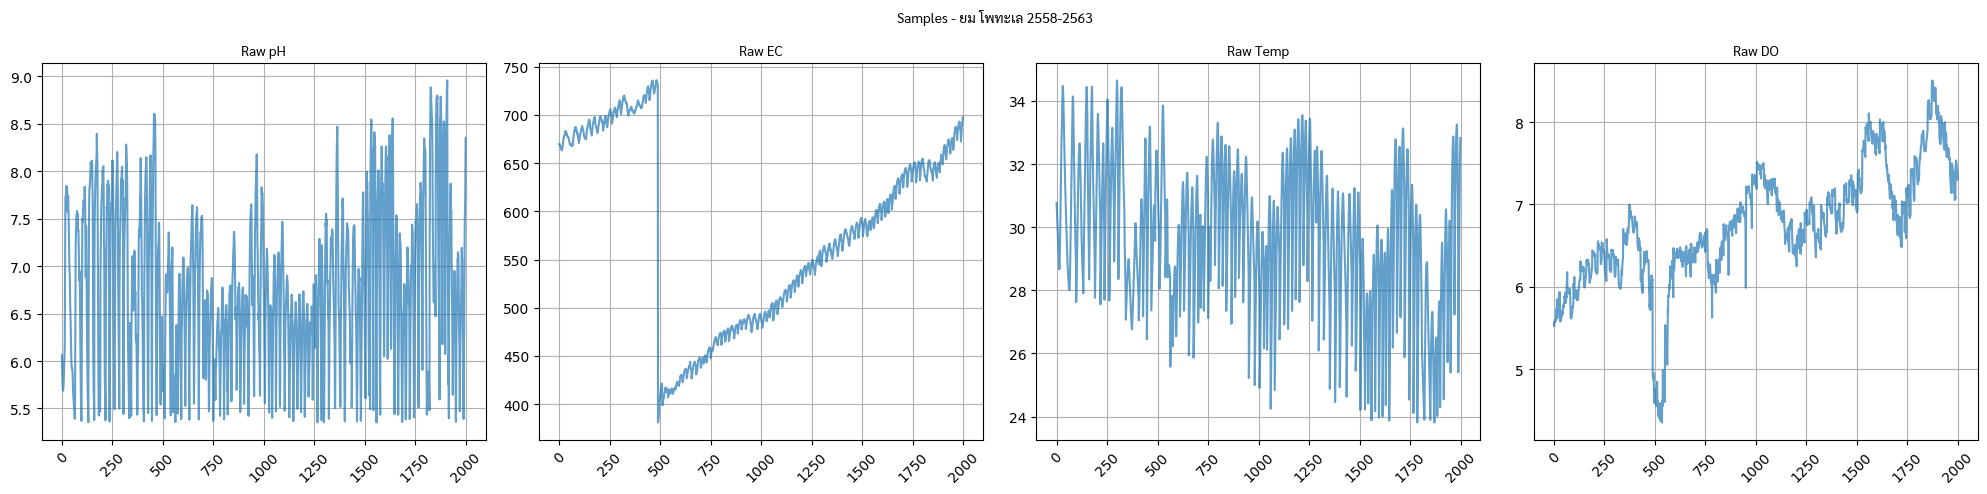

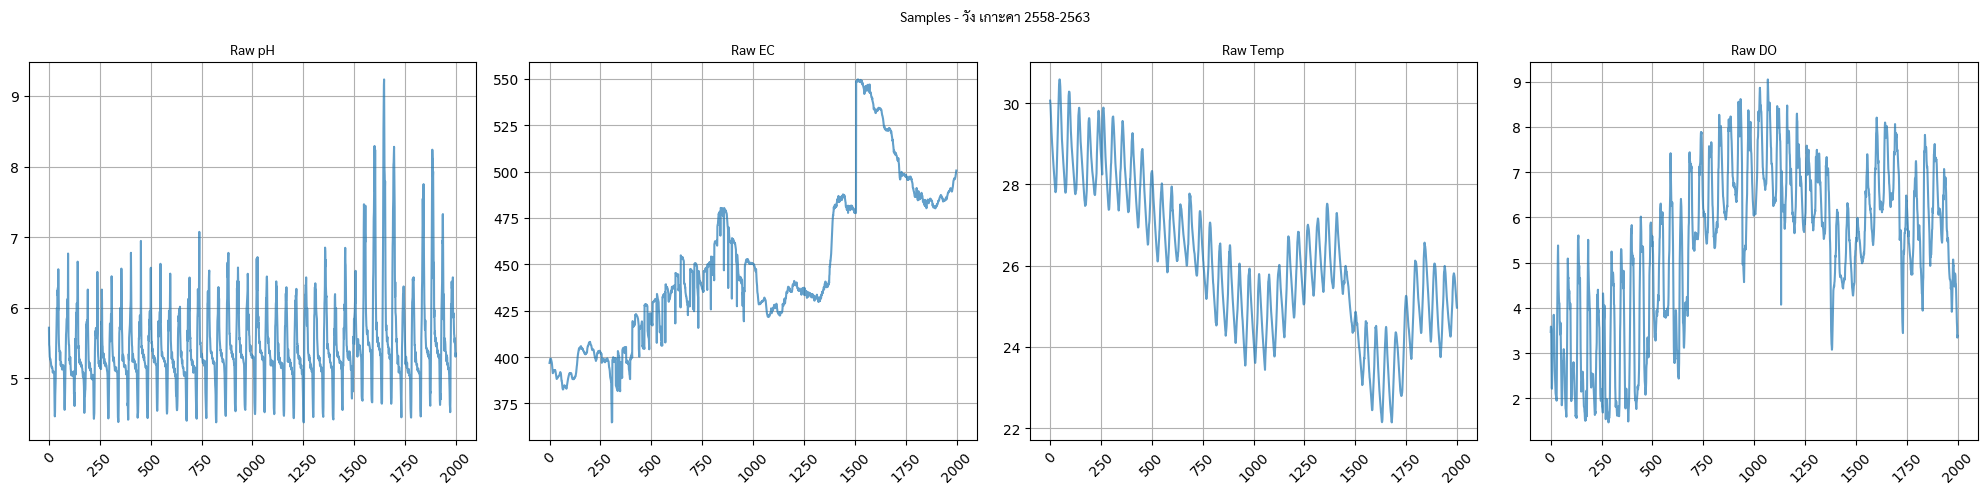

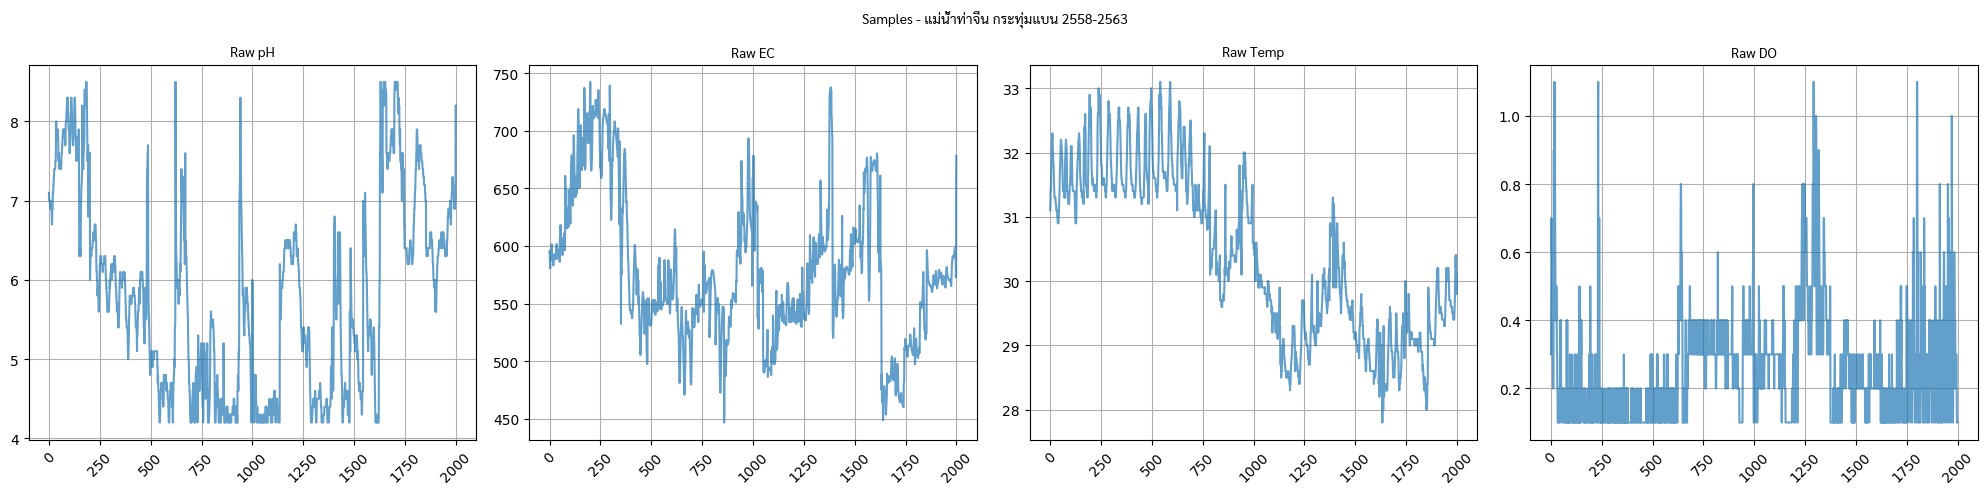

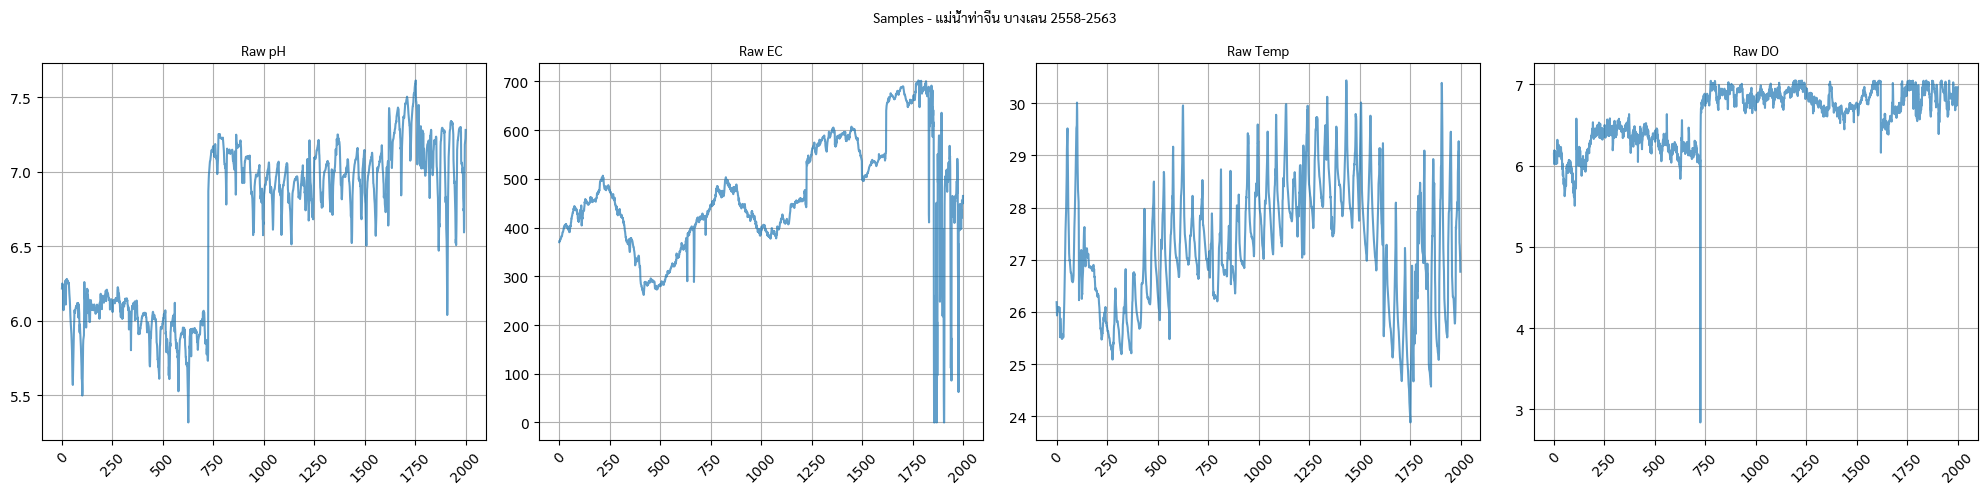

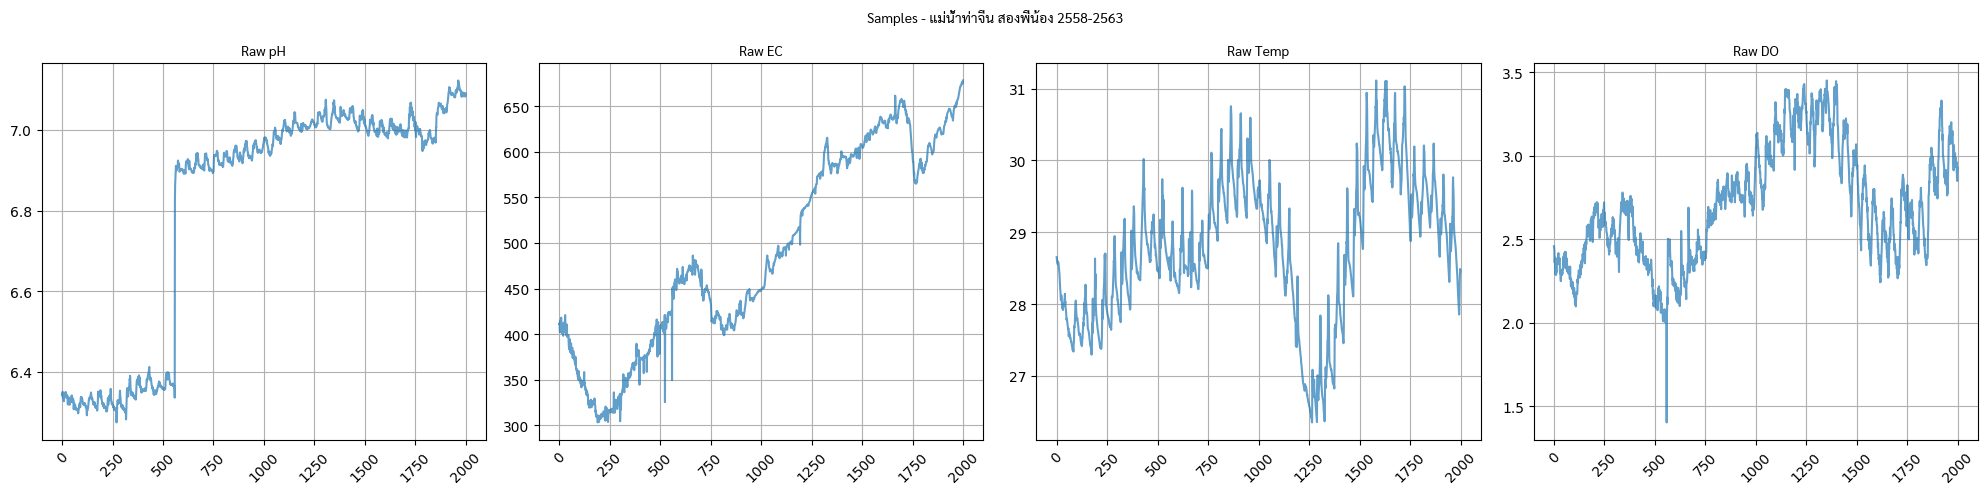

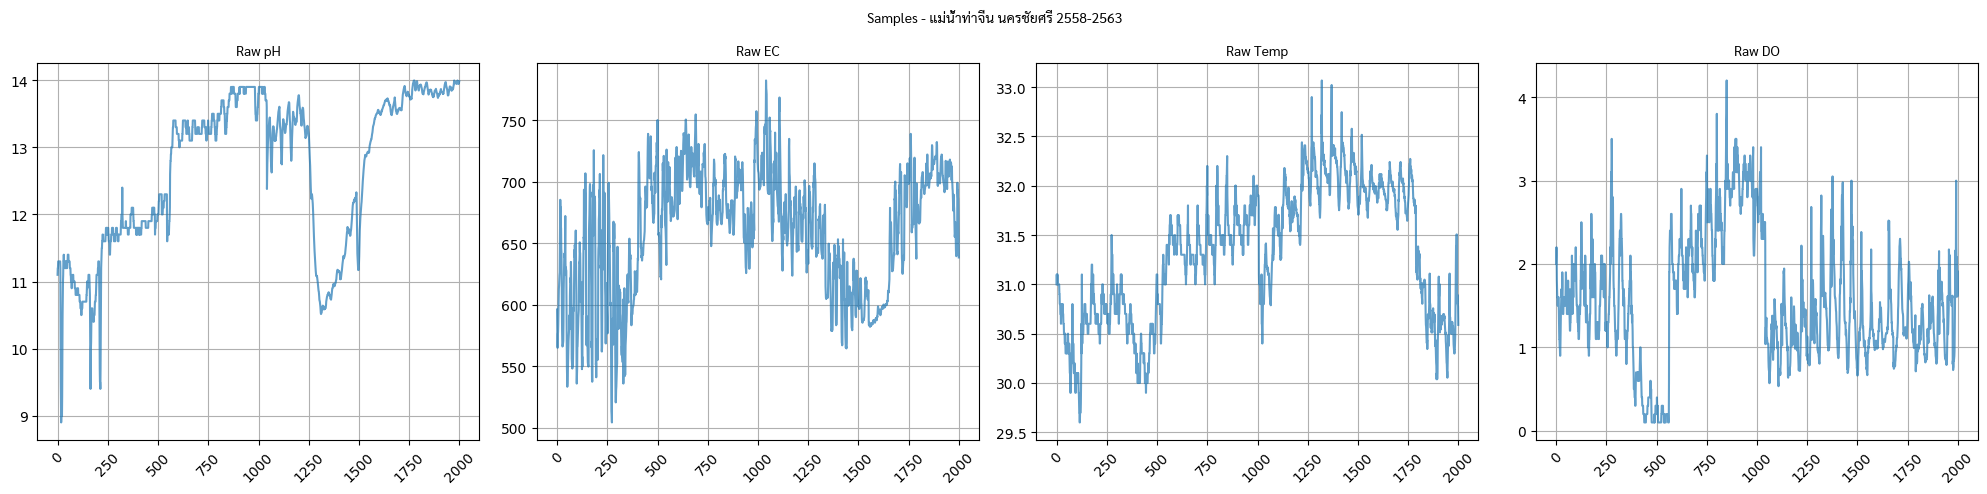

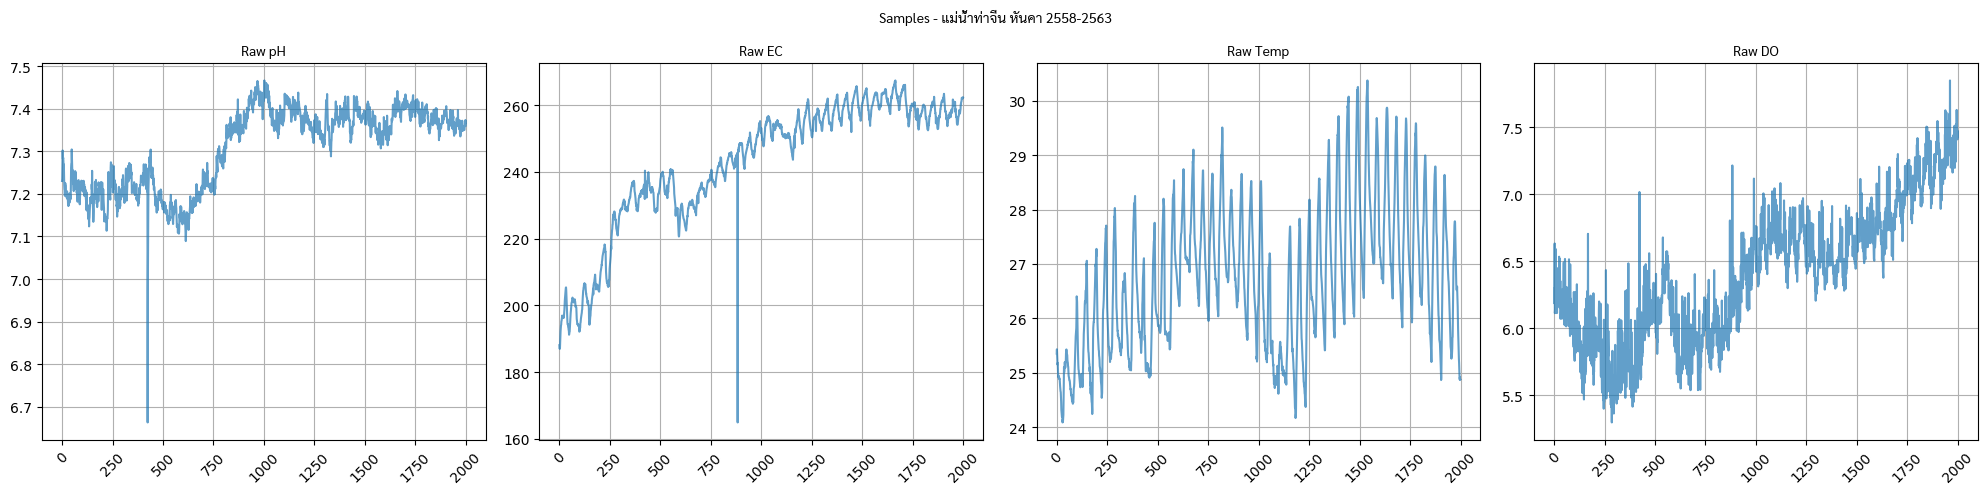

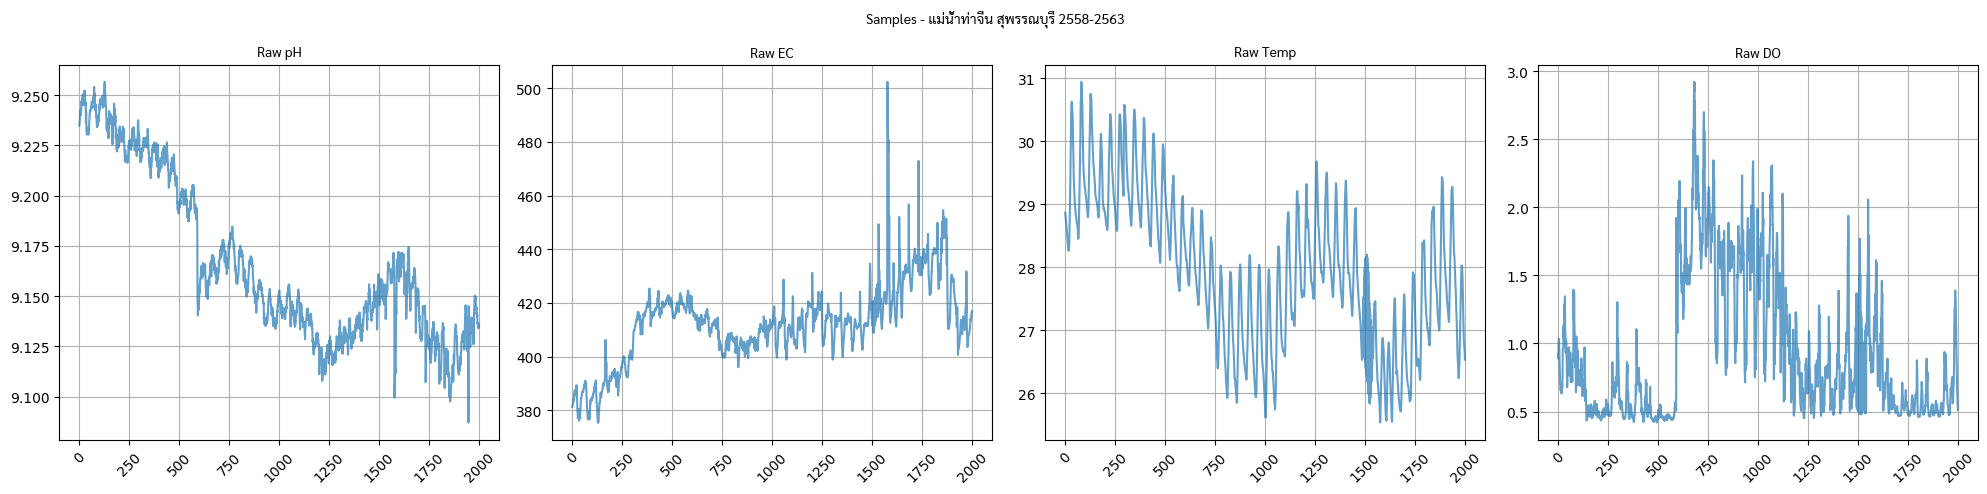

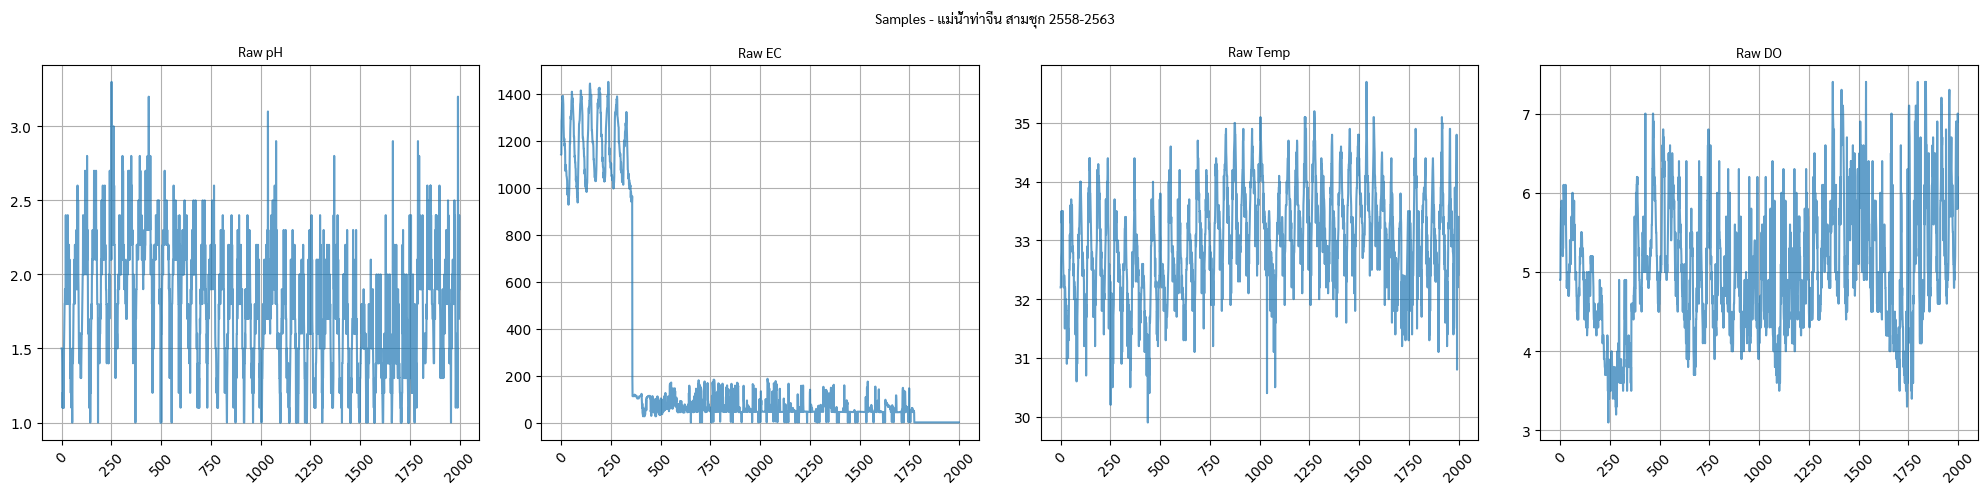

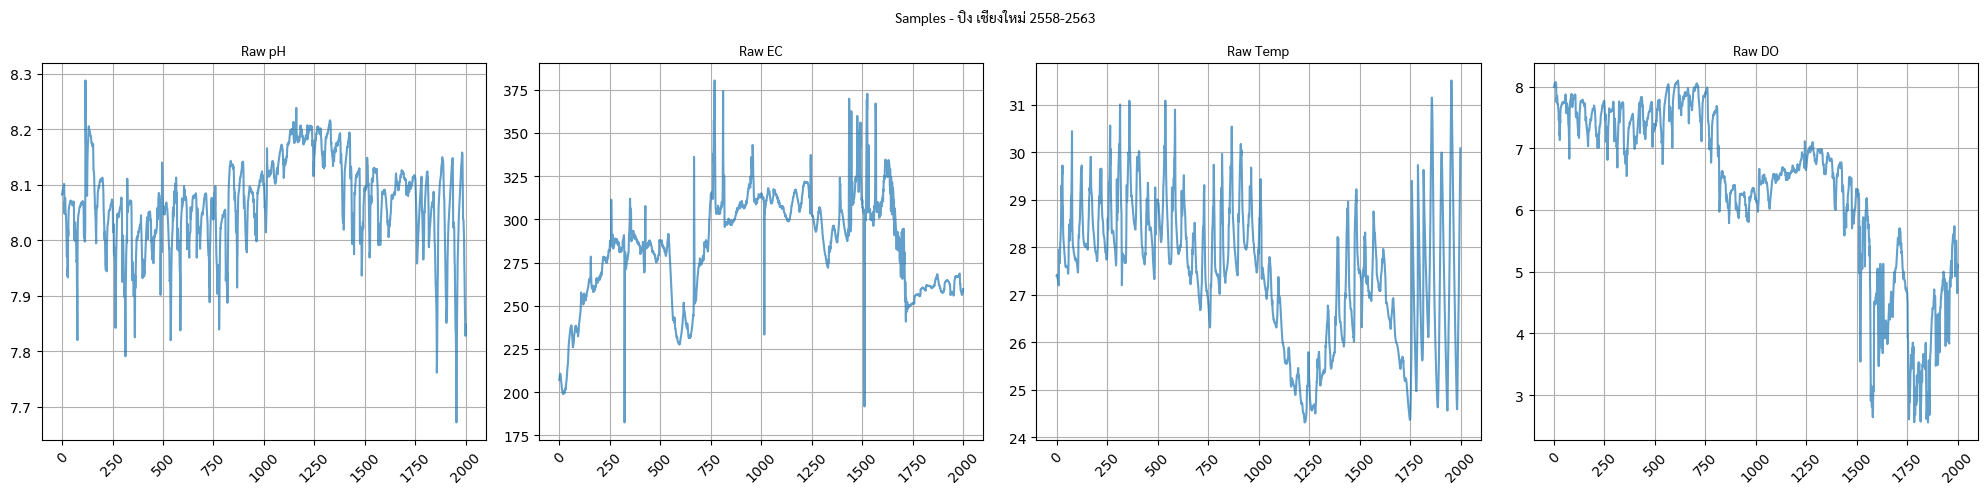

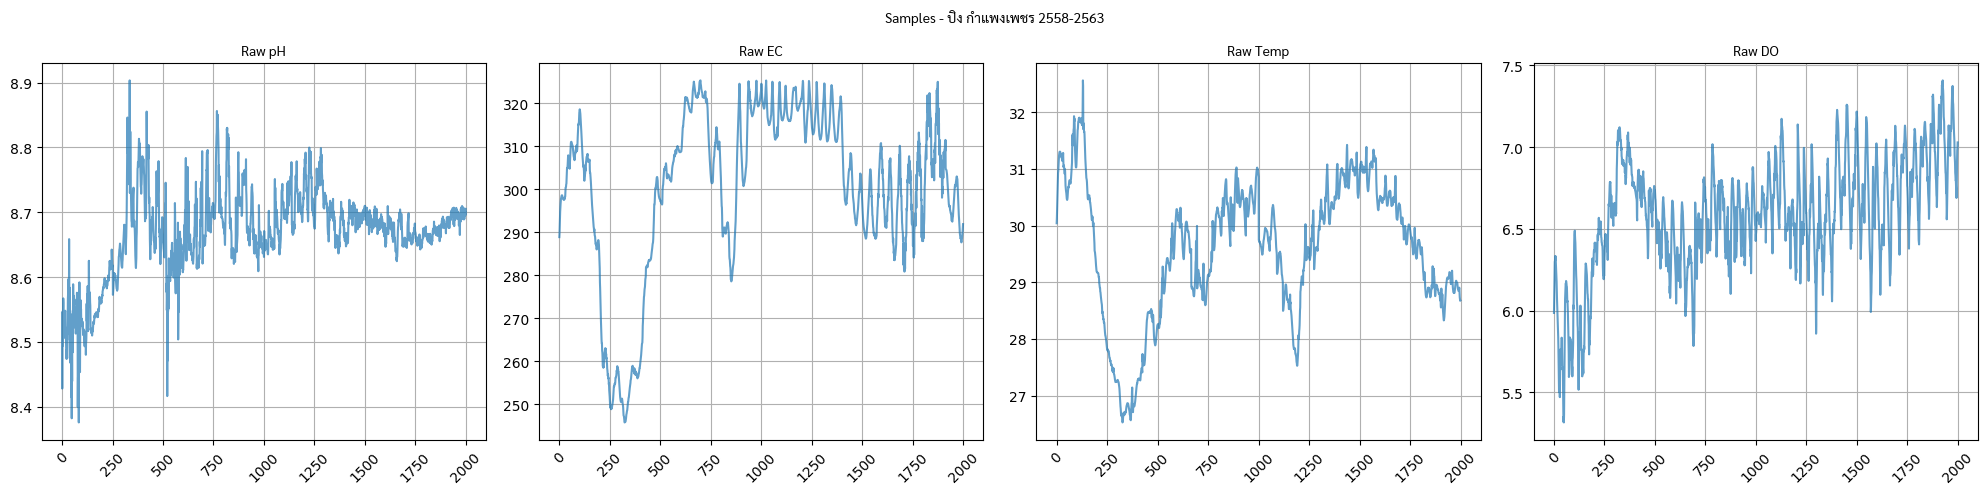

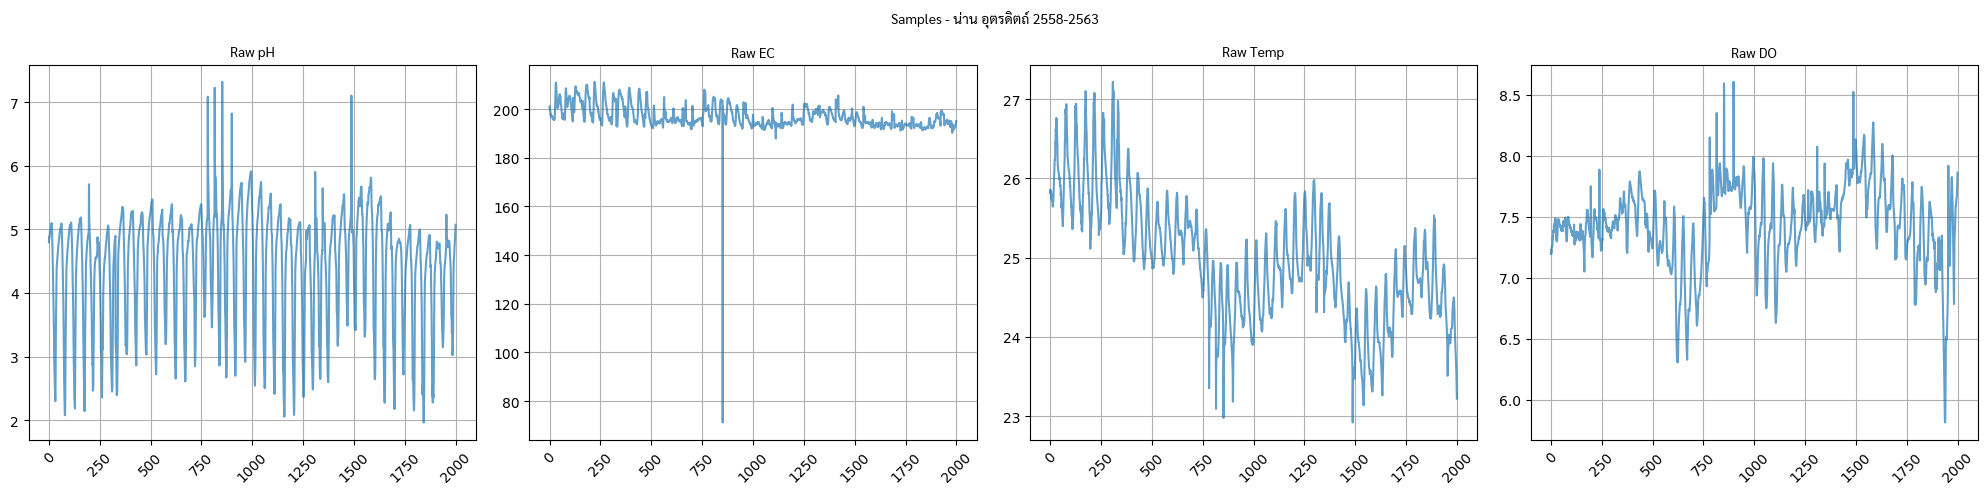

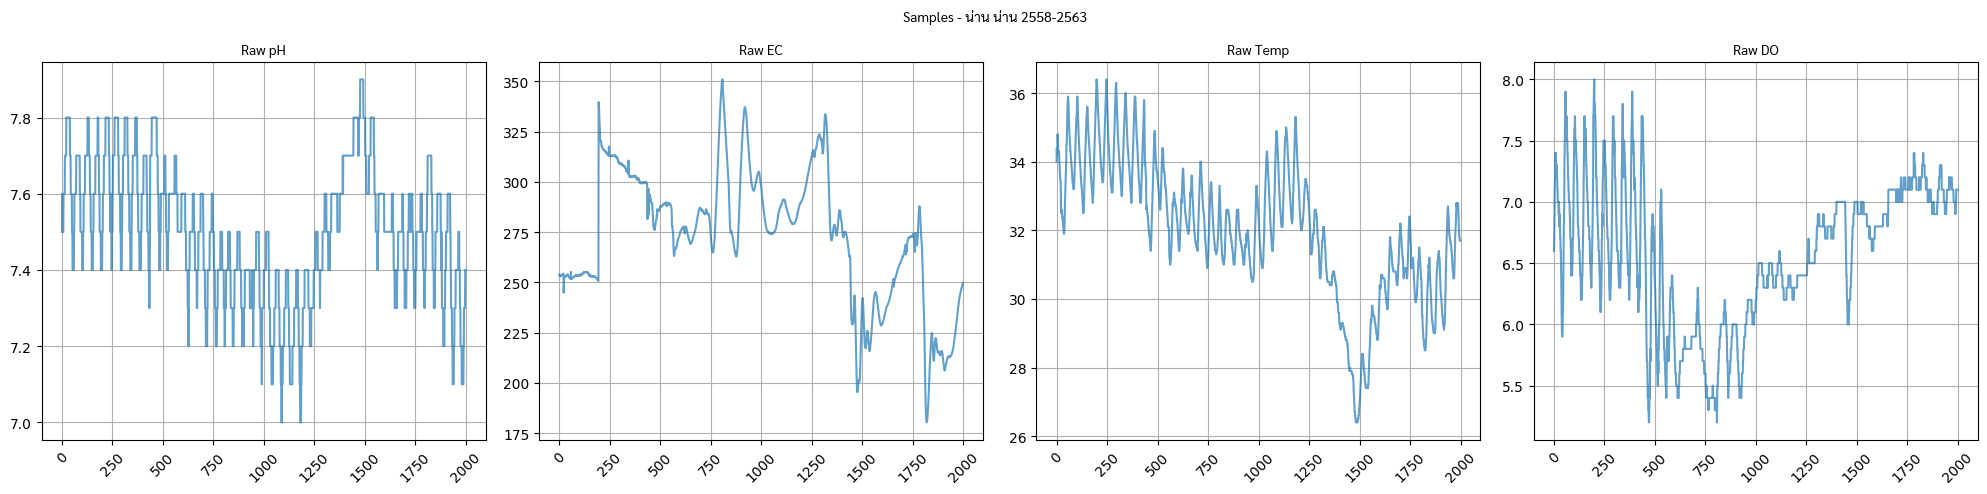

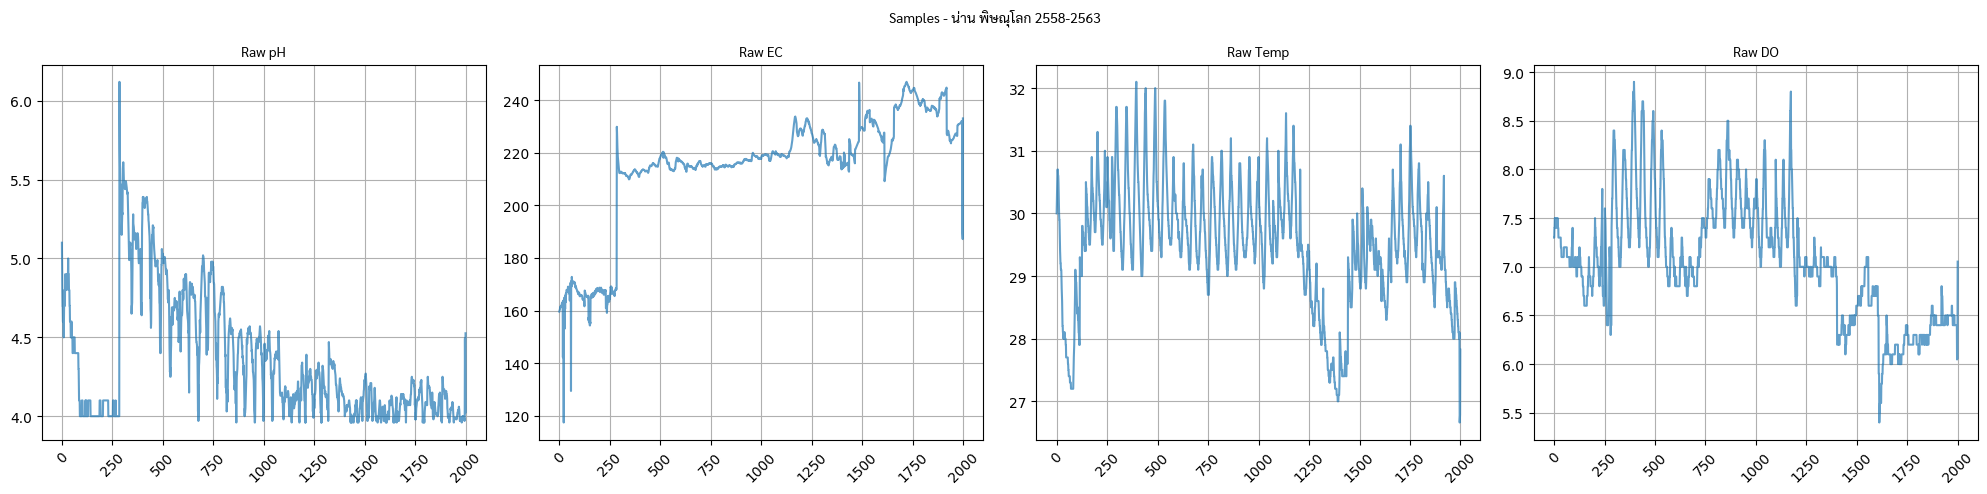

In [4]:
datasets: dict[str, Dataset] = load(DUMP_FILE)

for station, dataset in datasets.items():
    X = dataset.X
    y = dataset.y

    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

    for i, param in enumerate(["pH", "EC", "Temp", "DO"][:-1]):
        axes[i].plot(X.index, X[param], label="Raw Data", alpha=0.7)
        axes[i].set_title(f"Raw {param}", fontproperties=font_prop)
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

    axes[3].plot(X.index, y, label="Raw Data", alpha=0.7)
    axes[3].set_title(f"Raw DO", fontproperties=font_prop)
    axes[3].grid(True)
    axes[3].tick_params(axis='x', rotation=45)

    fig.suptitle(f"Samples - {station}", fontproperties=font_prop)

    plt.tight_layout()
    plt.savefig(OUTPUT_STAT_PATH / f"sample-set-{station}.png")
    plt.show()